In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sys

# Import our modular code
from constants import *
from equations import bloch_equations, g_matrix, laser_pulse
from solver import rk4

# Configure matplotlib for interactive plots
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("✓ All modules imported successfully!")
print(f"Number of energy levels: {N}")
print(f"Time range: {t_0} to {t_max} fs")
print(f"Default χ₀ values: {chi0_values}")

✓ All modules imported successfully!
Number of energy levels: 100
Time range: -75.0 to 500.0 fs
Default χ₀ values: [0.1, 0.5, 1.0, 1.5, 2.0]


## Experiment 1: Single Simulation

Run a simulation for a specific laser intensity (χ₀) and visualize the results.

In [20]:
chi0_experiment = 1.0

print(f"Running simulation for χ₀ = {chi0_experiment}")

# Initial conditions
y0 = np.zeros(3*N)
N_steps = int((t_max - t_0) / dt)

# Solve the equations
args = (chi0_experiment, delta_t, Delta_0, T2, E_R, Delta_epsilon, g_matrix)
t, y = rk4(bloch_equations, t_0, t_max, N_steps, y0, args)

# Extract results
f_n = y[:, :N]
p_n_real = y[:, N:2*N]
p_n_imag = y[:, 2*N:3*N]
p_n = p_n_real + 1j * p_n_imag

# Compute observables
C0 = 2.0
N_t = C0 * np.sum(np.sqrt(np.arange(1, N+1)) * f_n, axis=1)
P_t = np.abs(np.sum(p_n, axis=1))




print(f"Max particle density: {np.max(N_t):.4f}")
print(f"Max polarization: {np.max(P_t):.4f}")


Running simulation for χ₀ = 1.0
Max particle density: 202.1842
Max polarization: 19.7881


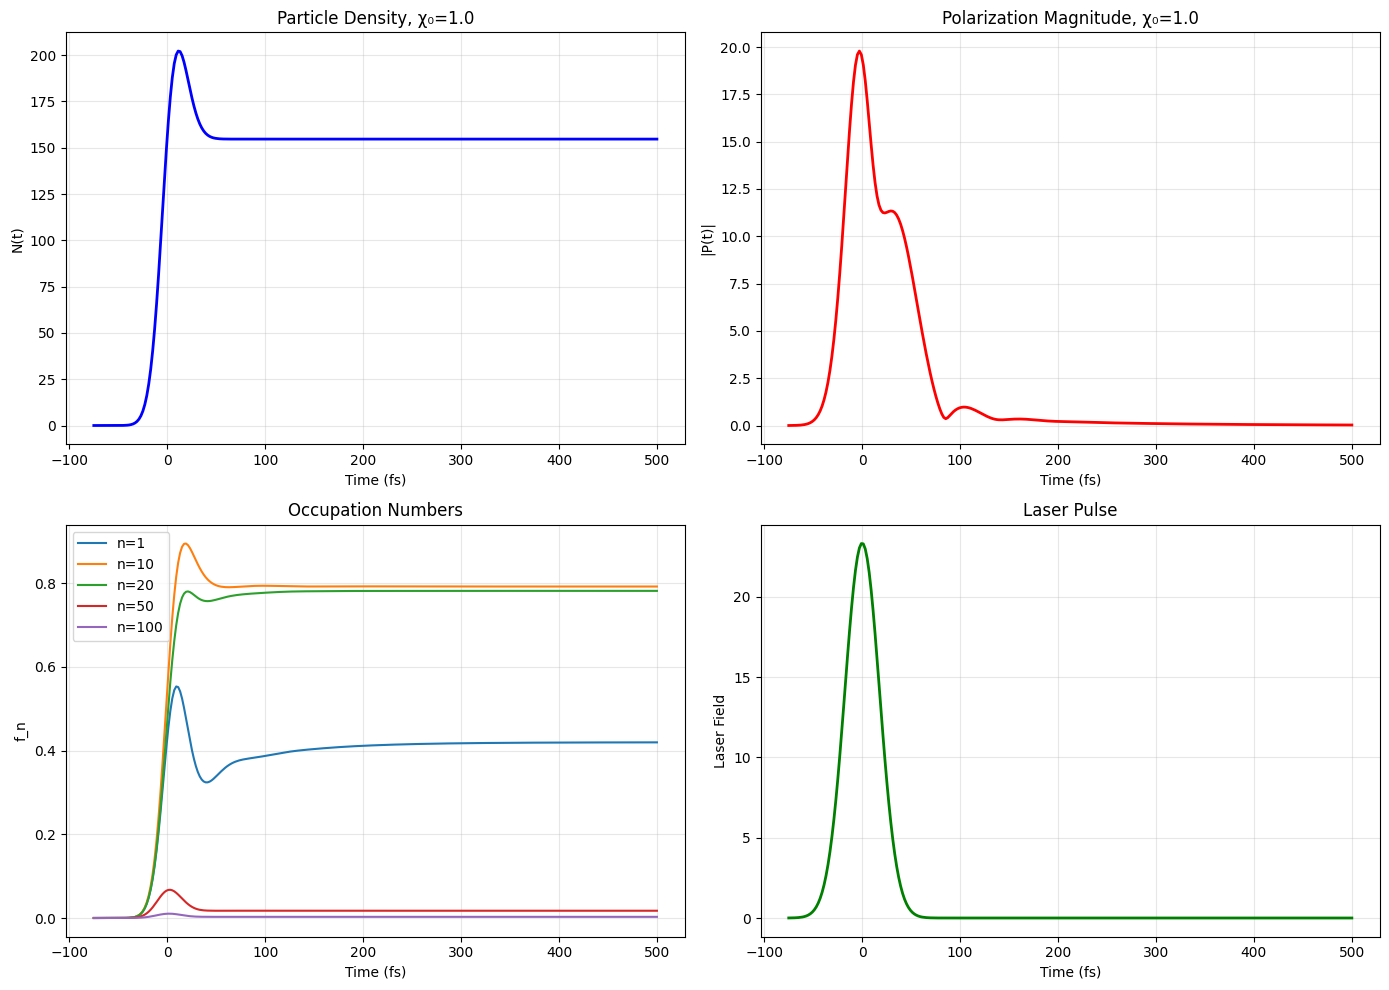

In [21]:
# Plot particle density and polarization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Particle Density
axes[0, 0].plot(t, N_t, linewidth=2, color='blue')
axes[0, 0].set_xlabel('Time (fs)')
axes[0, 0].set_ylabel('N(t)')
axes[0, 0].set_title(f'Particle Density, χ₀={chi0_experiment}')
axes[0, 0].grid(True, alpha=0.3)

# Polarization
axes[0, 1].plot(t, P_t, linewidth=2, color='red')
axes[0, 1].set_xlabel('Time (fs)')
axes[0, 1].set_ylabel('|P(t)|')
axes[0, 1].set_title(f'Polarization Magnitude, χ₀={chi0_experiment}')
axes[0, 1].grid(True, alpha=0.3)

# Occupation numbers for selected levels
selected_levels = [0, 9, 19, 49, 99]
for level in selected_levels:
    if level < N:
        axes[1, 0].plot(t, f_n[:, level], linewidth=1.5, label=f'n={level+1}')
axes[1, 0].set_xlabel('Time (fs)')
axes[1, 0].set_ylabel('f_n')
axes[1, 0].set_title('Occupation Numbers')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Laser pulse
laser = [laser_pulse(ti, chi0_experiment, delta_t) for ti in t]
axes[1, 1].plot(t, laser, linewidth=2, color='green')
axes[1, 1].set_xlabel('Time (fs)')
axes[1, 1].set_ylabel('Laser Field')
axes[1, 1].set_title('Laser Pulse')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Experiment 2: Compare Different Laser Intensities

In [ ]:
import pandas as pd

chi0_compare = [0.1, 3.0, 4.0]

results = {}

for chi0 in chi0_compare:
    y0 = np.zeros(3*N)
    args = (chi0, delta_t, Delta_0, T2, E_R, Delta_epsilon, g_matrix)
    t, y = rk4(bloch_equations, t_0, t_max, N_steps, y0, args)
    
    f_n = y[:, :N]
    p_n = y[:, N:2*N] + 1j * y[:, 2*N:3*N]
    
    N_t = C0 * np.sum(np.sqrt(np.arange(1, N+1)) * f_n, axis=1)
    P_t = np.abs(np.sum(p_n, axis=1))
    
    
    results[chi0] = {'t': t, 'N_t': N_t, 'P_t': P_t, 'f_n': f_n, 'p_n': p_n}
    
print(f"Completed χ₀ = {chi0}")

# print(f"\nSaving results to CSV files...")
# for chi0 in chi0_compare:
# 	df = pd.DataFrame({
# 		't': results[chi0]['t'],
# 		'N_t': results[chi0]['N_t'],
# 	})
# 	df.to_csv(f'results_chi0_{chi0}.csv', index=False)
# 	print(f"✓ Saved results_chi0_{chi0}.csv ({len(df)} data points)")
# print("All results saved successfully!")

# # Save P_t data as well
# for chi0 in chi0_compare:
# 	df_pt = pd.DataFrame({
# 		't': results[chi0]['t'],
# 		'P_t': results[chi0]['P_t'],
# 	})
# 	df_pt.to_csv(f'results_chi0_{chi0}_P_t.csv', index=False)
# 	print(f"✓ Saved results_chi0_{chi0}_P_t.csv ({len(df_pt)} data points)")



Completed χ₀ = 4.0

Saving results to CSV files...
✓ Saved results_chi0_0.1.csv (288 data points)
✓ Saved results_chi0_3.0.csv (288 data points)
✓ Saved results_chi0_4.0.csv (288 data points)
All results saved successfully!
✓ Saved results_chi0_0.1_P_t.csv (288 data points)
✓ Saved results_chi0_3.0_P_t.csv (288 data points)
✓ Saved results_chi0_4.0_P_t.csv (288 data points)


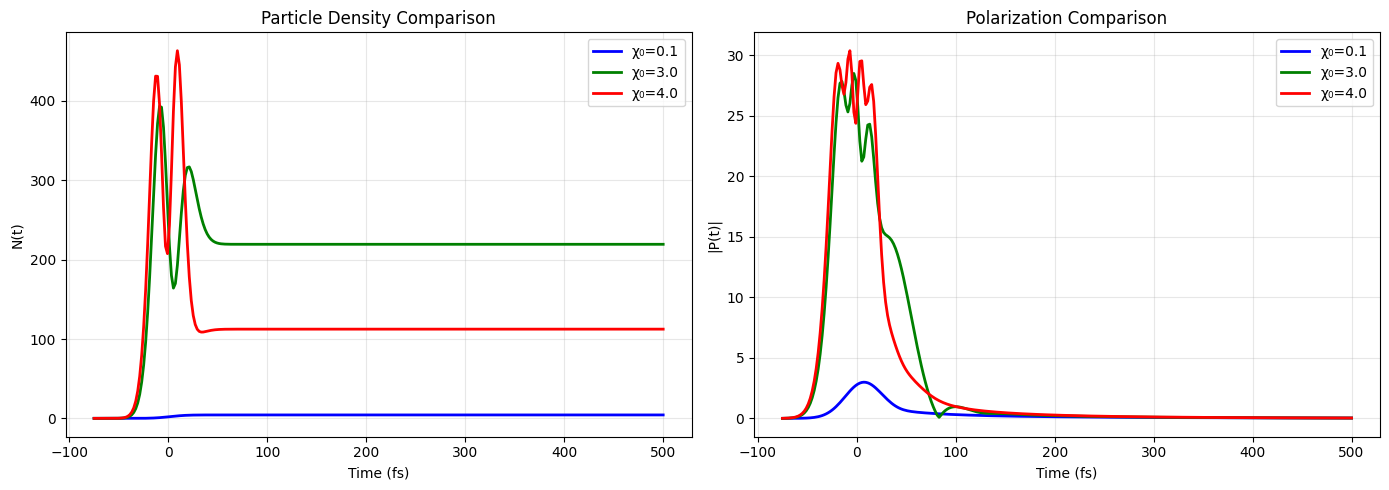

In [23]:
# Plot comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

colors = ['blue', 'green', 'red', 'orange', 'purple']

# Compare particle density
for i, chi0 in enumerate(chi0_compare):
    axes[0].plot(results[chi0]['t'], results[chi0]['N_t'], 
                 linewidth=2, color=colors[i], label=f'χ₀={chi0}')
axes[0].set_xlabel('Time (fs)')
axes[0].set_ylabel('N(t)')
axes[0].set_title('Particle Density Comparison')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Compare polarization
for i, chi0 in enumerate(chi0_compare):
    axes[1].plot(results[chi0]['t'], results[chi0]['P_t'], 
                 linewidth=2, color=colors[i], label=f'χ₀={chi0}')
axes[1].set_xlabel('Time (fs)')
axes[1].set_ylabel('|P(t)|')
axes[1].set_title('Polarization Comparison')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()